# Area

The `Area` represents the spatial environment of the survey. It sets the spatial bounds of the survey so it should be the first building block defined. All of the methods used to generate `Layer` and `Coverage` blocks will require the `Area` as an input parameter.

## Creating an `Area`

There are three main ways to create an `Area`.

1. from a `shapely` `Polygon`
2. from a shapefile
3. from a value specifying the resulting area

We will take a look at examples of all three. First, let's import `prospect` as `prospect`.

In [1]:
import prospect

### From a `shapely Polygon`

We can create an `Area` from any `shapely` `Polygon` object. Let's create a fairly simple polygon (a pentagon) and use it to create an `Area`.

In [2]:
from shapely.geometry import Polygon
pentagon = Polygon([(0, 0), (2, 0), (2, 1), (1, 2), (0, 1)])

In [3]:
area_shapely = prospect.Area(name='from shapely rectangle', shape=pentagon, vis=1.0)

`Area` objects have the following attributes: `name`, `shape`, `vis`, and `df`.

In [4]:
area_shapely.name

'from shapely rectangle'

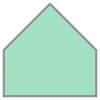

In [5]:
area_shapely.shape

In [6]:
area_shapely.vis

1.0

In [7]:
area_shapely.df

,name,shape,vis
0,from shapely rectangle,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",1.0


Of these, `df` is the most useful because it is a `geopandas` `GeoDataFrame` containing all of the other values.

`geopandas` provides some plotting options for `GeoDataFrame` objects, so we can visually examine the resulting `Area` in a `matplotlib` plot by calling the `plot()` method on the `df` attribute.

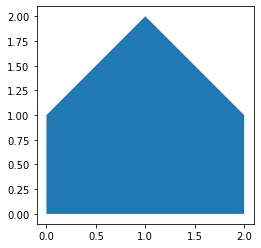

In [8]:
area_shapely.df.plot()

### From a shapefile

```{caution}
If the shapefile contains more than one polygon, only the first polygon will be used. If you want to create an `Area` by combining multiple polygons, you will first have to dissolve them into a single polygon.
```

In [9]:
area_shp = prospect.Area.from_shapefile(name='from shapefile', path='./data/demo_area.shp', vis=1.0, encoding="utf-8")

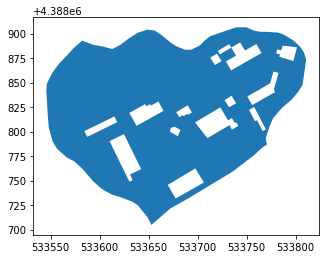

In [15]:
area_shp.df.plot();

```{note}
`prospect` has no difficulty dealing with polygons that have interior holes.
```

### From an area value

The final way to construct an `Area` object is to create a square by specifying a desired area value and an origin. This is intended to be a convenient method for use in building hypothetical surveys. The following creates an `Area` with an area of 100.0 sq. units with a lower left corner at (20, 20).

In [11]:
area_value = prospect.Area.from_area_value(
    name='from value', 
    value=100.0, 
    origin=(20.0, 20.0), 
    vis=1.0
)

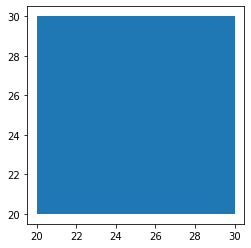

In [12]:
area_value.df.plot()

## The `vis` parameter

Besides defining the spatial extent of the survey, the `Area` also defines the surface visibility parameter of the simulation. Like all parameters, the surface visibility can be defined with a single probability value or as a `scipy.stats` distribution. (In the future, I hope to add additional support for a raster "surface" of visibility.)

If a single value is inappropriate for your case, surface visibility can be modeled in a variety of ways. Both a truncated normal distribution (constrained between 0 and 1) and a Beta distribution could be good options. In the case of the Beta distribution, the following heuristic can be helpful: 
>If $n$ artifacts were placed in a subset of that `Area`, how many artifacts, $v$, would be visible to the surveyor, assuming a perfect ideal observation rate of 1.0 and a perfect surveyor skill of 1.0?

In that case, $\alpha = v$ and $\beta = n - v$.

For example, if you placed 10 artifacts in an area and expected 8 to be visible, you could create a Beta distribution like this.

In [13]:
from scipy.stats import beta
vis_dist = beta(a=8, b=2)

And now let's examine the shape of that distribution. 

```{attention}
`seaborn`, used here for plotting, is not a dependency of `prospect` so you may not have it installed.
```

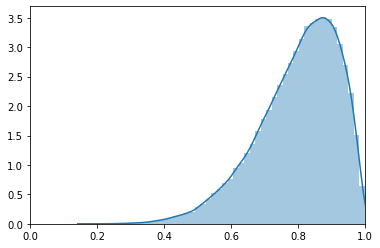

In [14]:
import seaborn as sns
hist_8_2 = sns.distplot(vis_dist.rvs(100000))
hist_8_2.set_xlim(0,1);